In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd

from urllib.error import HTTPError # recognise the error stemming from missing data
#import urllib
import urllib.request



In [12]:
#Define an exception which will be raised if the data is missing and stop the notebook execution
class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    
#shot_no =46422,46420,48899, 48955  #test discharge for which the notebook will definitely work


shot_no= 49093
shot=shot_no
ds = np.DataSource('/tmp')  # temporary storage for downloaded files
scalars_URL = 'http://golem.fjfi.cvut.cz/shots/{shot_no}/Diagnostics/PlasmaDetection/Results/{name}'
def get_scalar(shot_no, name):
    return float(ds.open(scalars_URL.format(shot_no=shot_no, name=name)).read())
t_plasma_start = get_scalar(shot_no, 't_plasma_start')
t_plasma_end = get_scalar(shot_no, 't_plasma_end')
is_plasma = get_scalar(shot_no, 'b_plasma')





#print(Tfirst[78395])   

In [13]:
#meze obrázků - aby všechny byly stejně
global_path='F:/mereni/mereni2609_24_golem_Be_win/'


if is_plasma == 1:
        for t in (t_plasma_start, t_plasma_end):
                xminim = 0
                xmaxim=t_plasma_start/2 + t_plasma_end
                xmaxim_s = xmaxim/1000 
else: 
    xminim = 0
    xmaxim = 50
    xmaxim_s = xmaxim/1000 
    

yminim = 0 
ymaxim = 12500
#ymaxim = 9000
#ymaxim = 20000
#ymaxim = 7000
ymaxim = 8000




In [14]:


def get_file(shot, identifier):
    # URL souboru
    URL = 'http://golem.fjfi.cvut.cz/shots/{shot}/Diagnostics/LimiterMirnovCoils/{identifier}.csv'
    url = URL.format(shot=shot, identifier=identifier)
    
    url = URL.format(shot=shot, identifier=identifier)
    try:
        file_name=url
        with urllib.request.urlopen(file_name) as f:
            line = f.readline()
            line = line.decode('utf‐8')
        f.close
    except HTTPError:
        print('File not found at %s. Aborting notebook execution.' % url)
        raise StopExecution
    
    return file_name

In [15]:
def mirnov_coils(file_path,mir_coil_fig,xminim,xmaxim_s,ymaxim):
    df = pd.read_csv(file_path, delimiter=",", header=None)

    # Extrakce časových a signálních hodnot
    time = df[0].values
    signal = df[1].values
    signal_mirnov=np.array(df[1].values)
    
    print(50/len(signal))
    
    signal_new=[]
    time_new=[]
    #Toto plati pro cas sberu 30 ms:
    #default je fs = 500000
    #increment=20 #20 pro dt=40000
    increment=10 #10 pro dt=20000
    #increment=40 #40 pro dt=80000
    #increment= 25#25 pro dt=50000
    
    
    for i in range(0, len(signal),increment):
        signal_pom=float(0)
        time_pom=float(0)
        if (i + increment)>len(signal):
            break
        for j in range(0,increment):
            signal_pom=signal_pom +float(signal[i+j])
            time_pom=time_pom +float(time[i+j])
           
        signal_new.append(float(signal_pom)/float(increment))
        time_new.append(float(time_pom)/float(increment))
        
        #signal_new.append((float(signal[i])+float(signal[i+1]))/2)
        #time_new.append((float(time[i])+float(time[i+1]))/2)
    
    fig, ax = plt.subplots(figsize =(30, 7))
    plt.plot(time, signal, drawstyle='steps-mid', linewidth=0.2)
    #plt.title('H03-W0051, #'+str(shot_no))
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    #plt.ylim(1000,100000)
    #plt.ylim(0,40000)
    #plt.xlim(0.00,0.025)
    plt.show()
    
    fig, ax = plt.subplots(figsize =(30, 7))
    plt.plot(time_new, signal_new, drawstyle='steps-mid', linewidth=0.2)
    #plt.title('H03-W0051, #'+str(shot_no))
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    #plt.ylim(1000,100000)
    #plt.ylim(0,40000)
    plt.xlim(xminim,xmaxim_s)
    
    #plt.savefig(mir_coil_fig, dpi = 100)
    plt.show()
    
    return time, signal,signal_mirnov, signal_new, increment, time_new
    

## Mirnov coils

### MC1

0.002


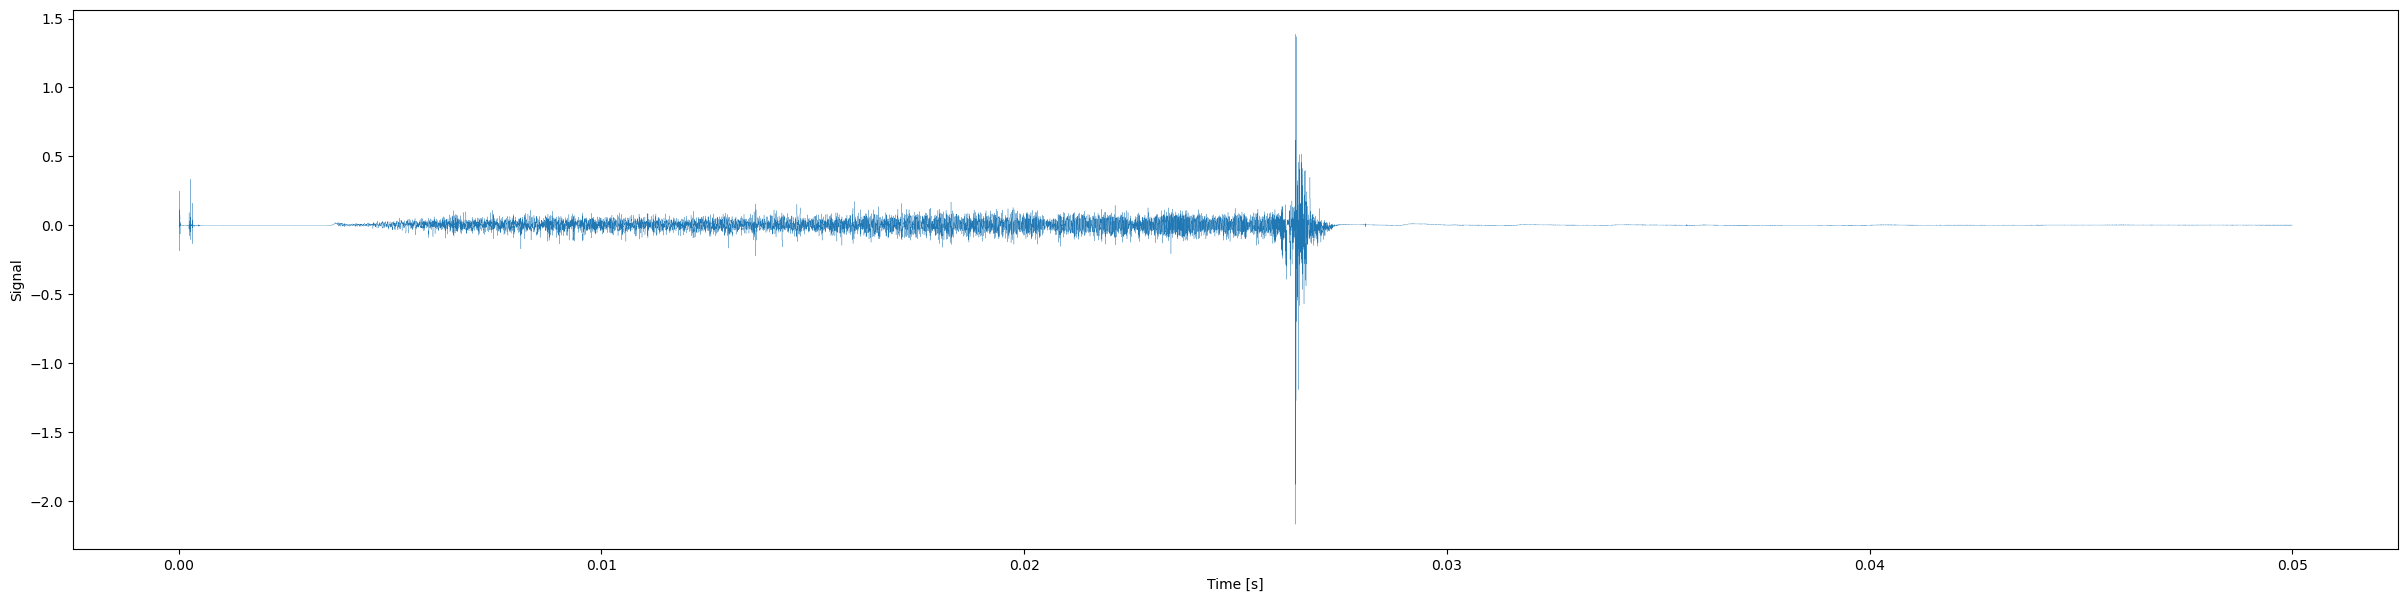

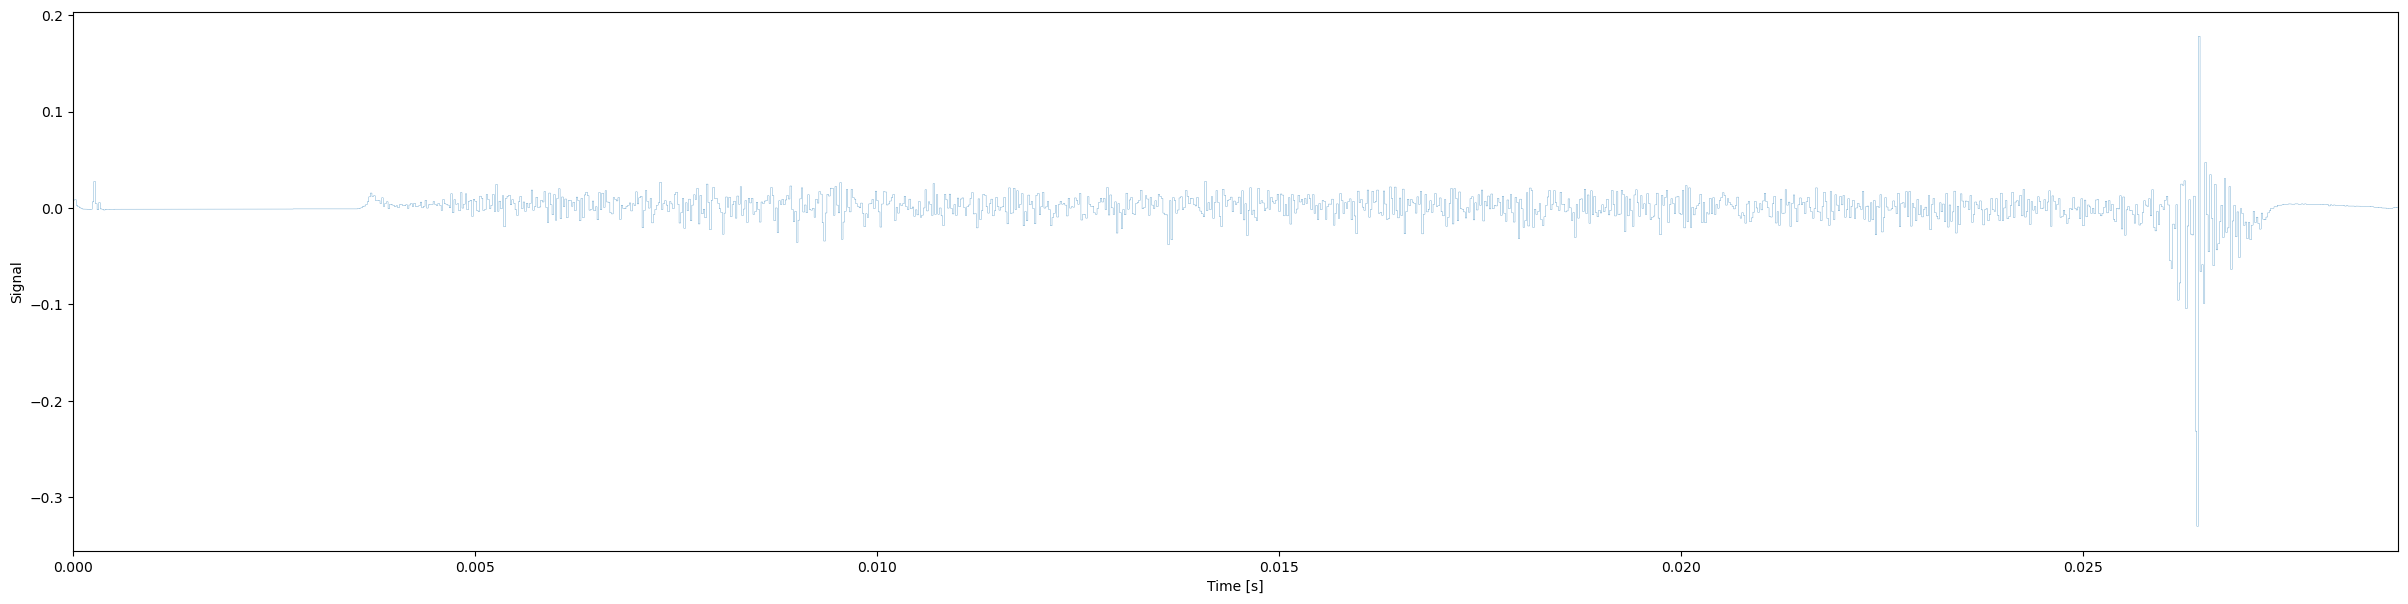

In [16]:
identifier='U_mc1'
#save_folder ='F:/mereni/mereni2609_24_golem_Be_win/shot'+str(shot)
file_name=get_file(shot, identifier)

#mir_coil_fig = str(global_path)+'shot'+str(shot)+'/U_mc1.png'
#print(mir_coil_fig)

mir_coil_fig =identifier

time, signal,signal_mirnov, signal_new, increment, time_new = mirnov_coils(file_name,mir_coil_fig,xminim,xmaxim_s,ymaxim)

signal_mc1=signal_new

### MC5

U_mc1
0.002


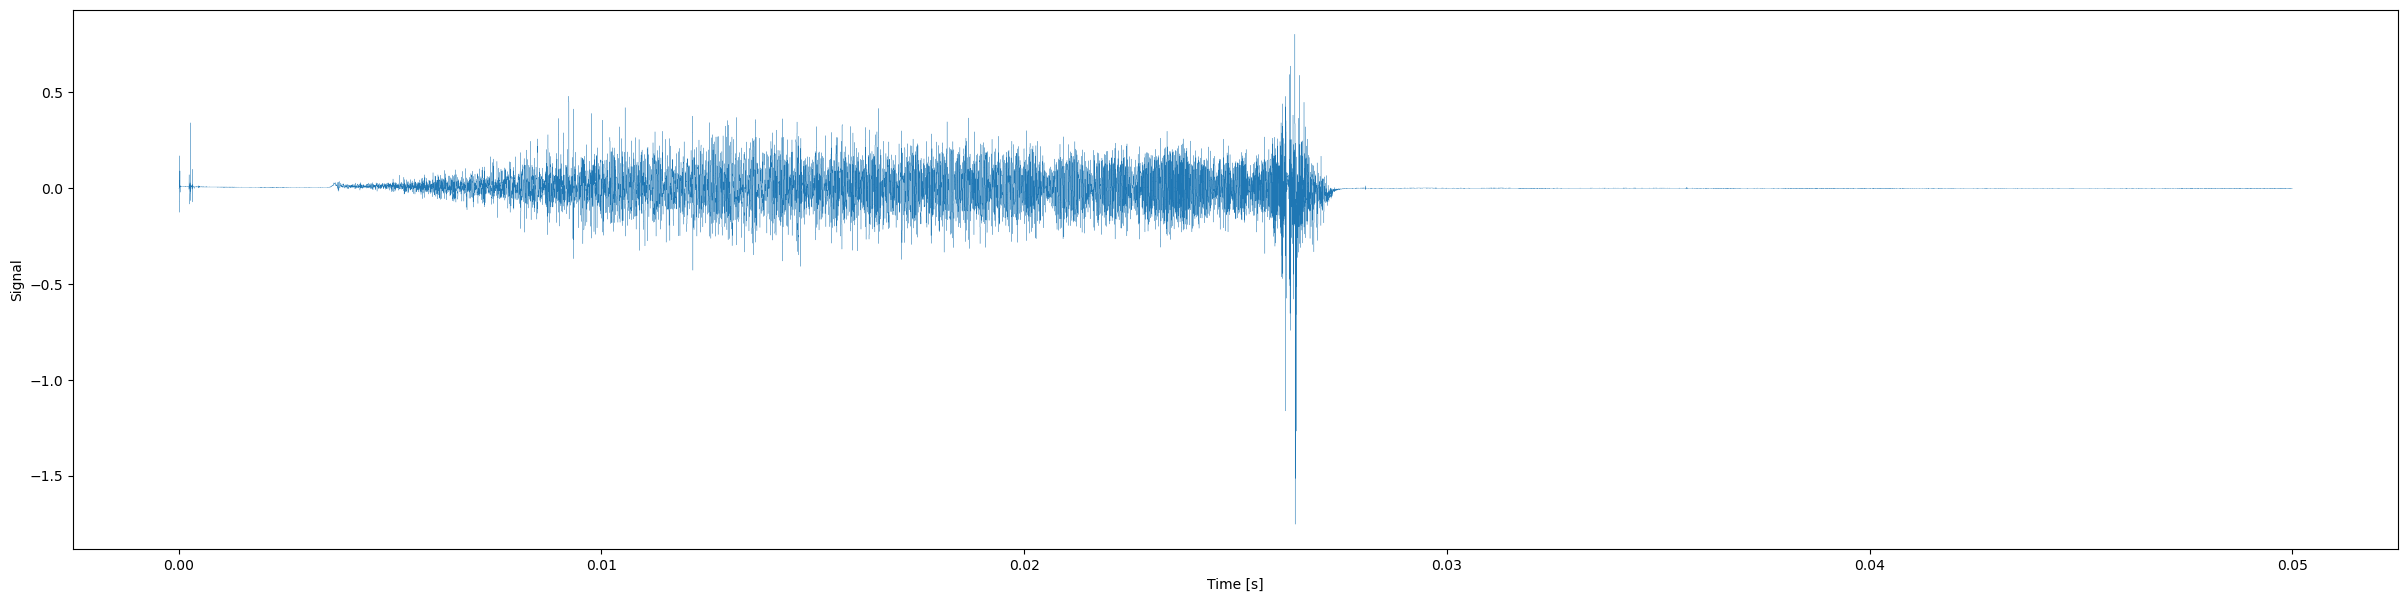

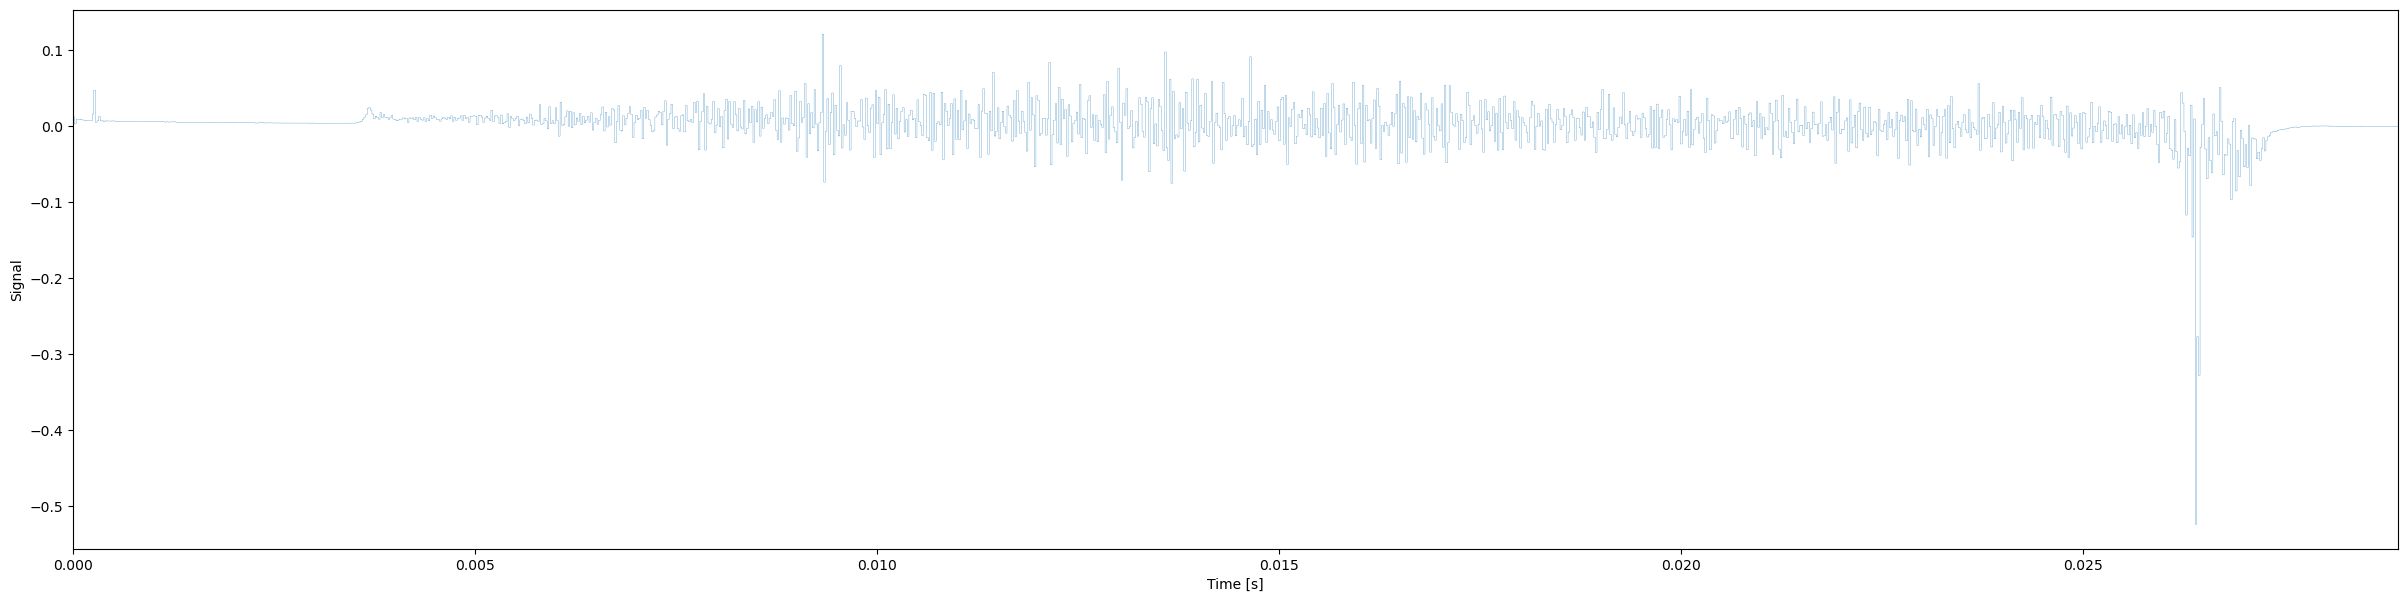

In [17]:
identifier='U_mc5'
#save_folder ='F:/mereni/mereni2609_24_golem_Be_win/shot'+str(shot)
file_name=get_file(shot, identifier)

#mir_coil_fig = str(global_path)+'shot'+str(shot)+'/U_mc5.png'
print(mir_coil_fig)
time, signal,signal_mirnov, signal_new, increment, time_new = mirnov_coils(file_name, mir_coil_fig,xminim,xmaxim_s,ymaxim)

signal_mc5=signal_new

### MC9

0.002


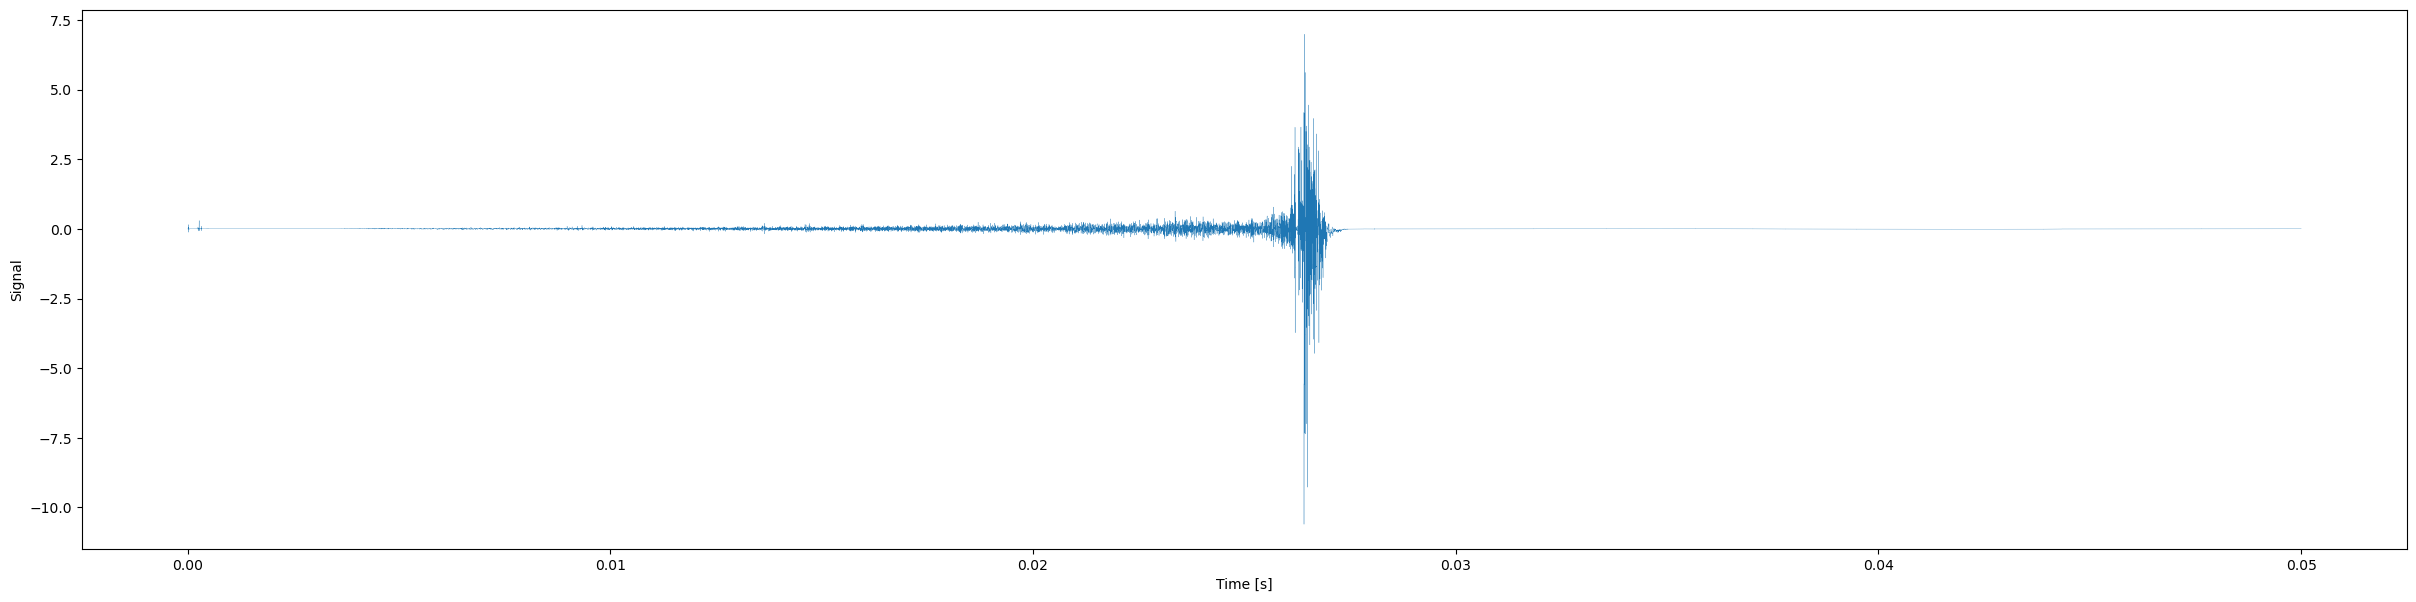

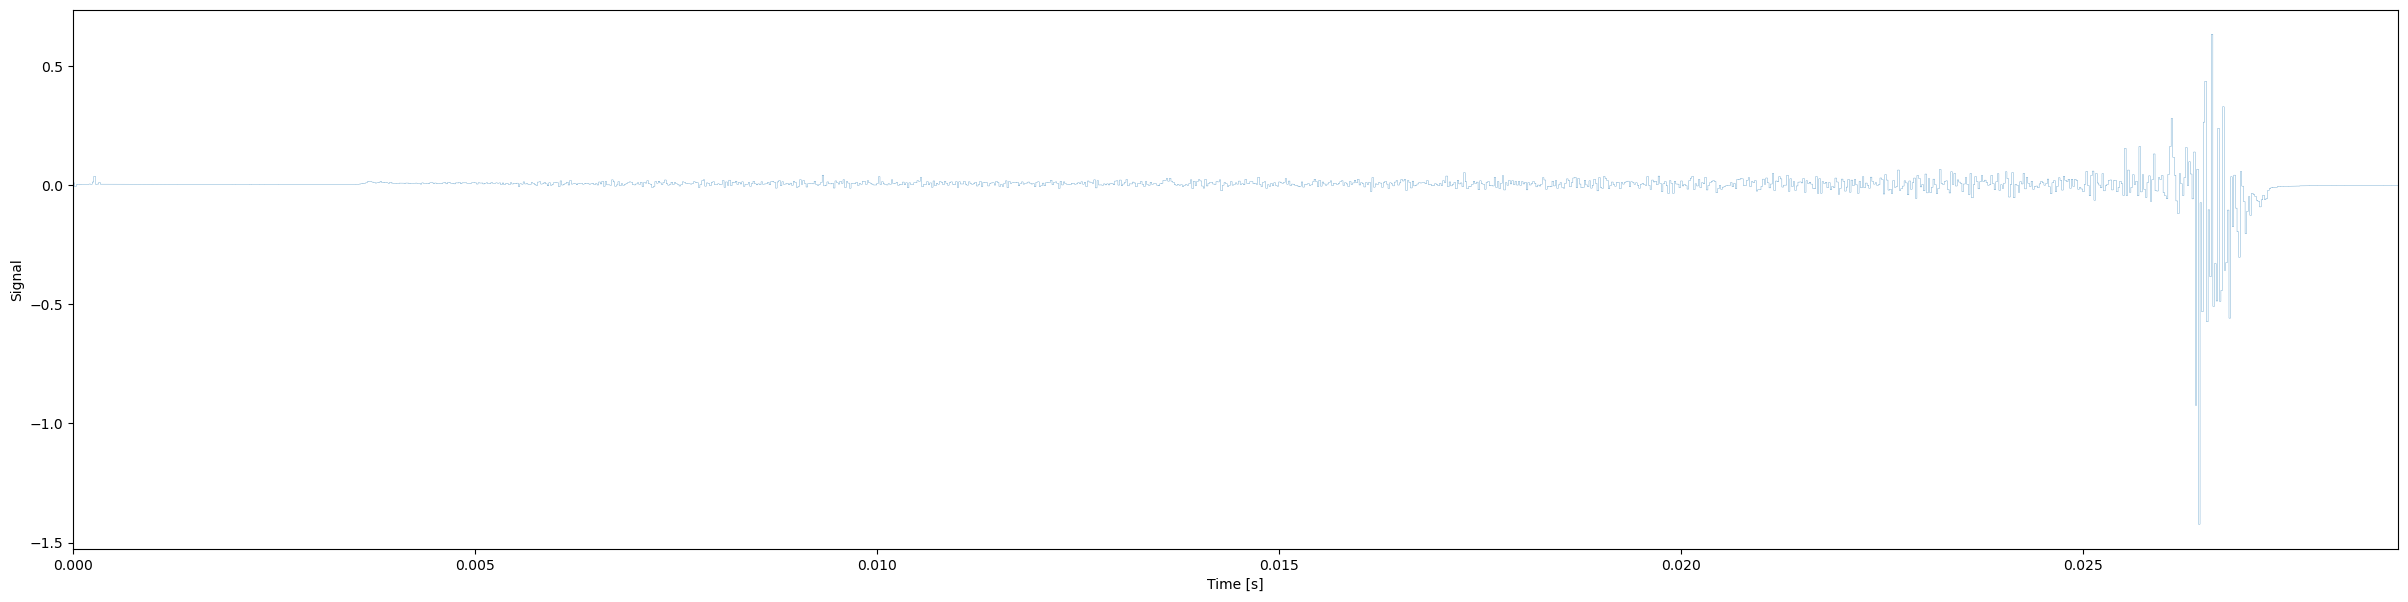

In [18]:
identifier='U_mc9'
#save_folder ='F:/mereni/mereni2609_24_golem_Be_win/shot'+str(shot)
file_name=get_file(shot, identifier)

#mir_coil_fig = str(global_path)+'shot'+str(shot)+'/U_mc9.png'
#print(mir_coil_fig)
time, signal,signal_mirnov, signal_new, increment, time_new = mirnov_coils(file_name,mir_coil_fig,xminim,xmaxim_s,ymaxim)

signal_mc9=signal_new

### MC13

0.002


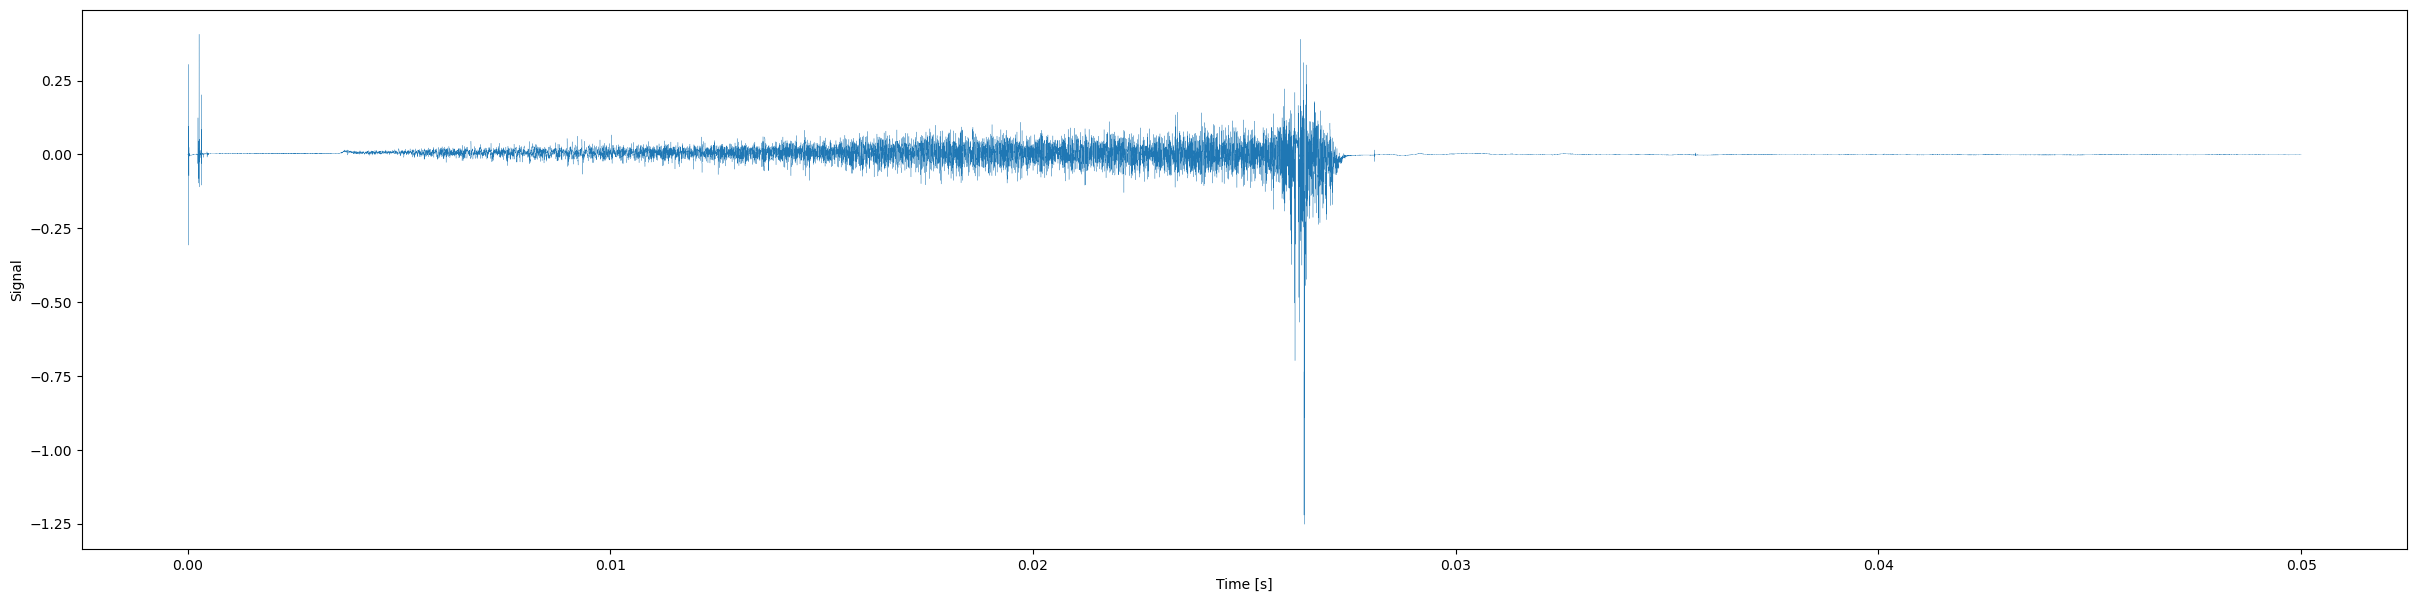

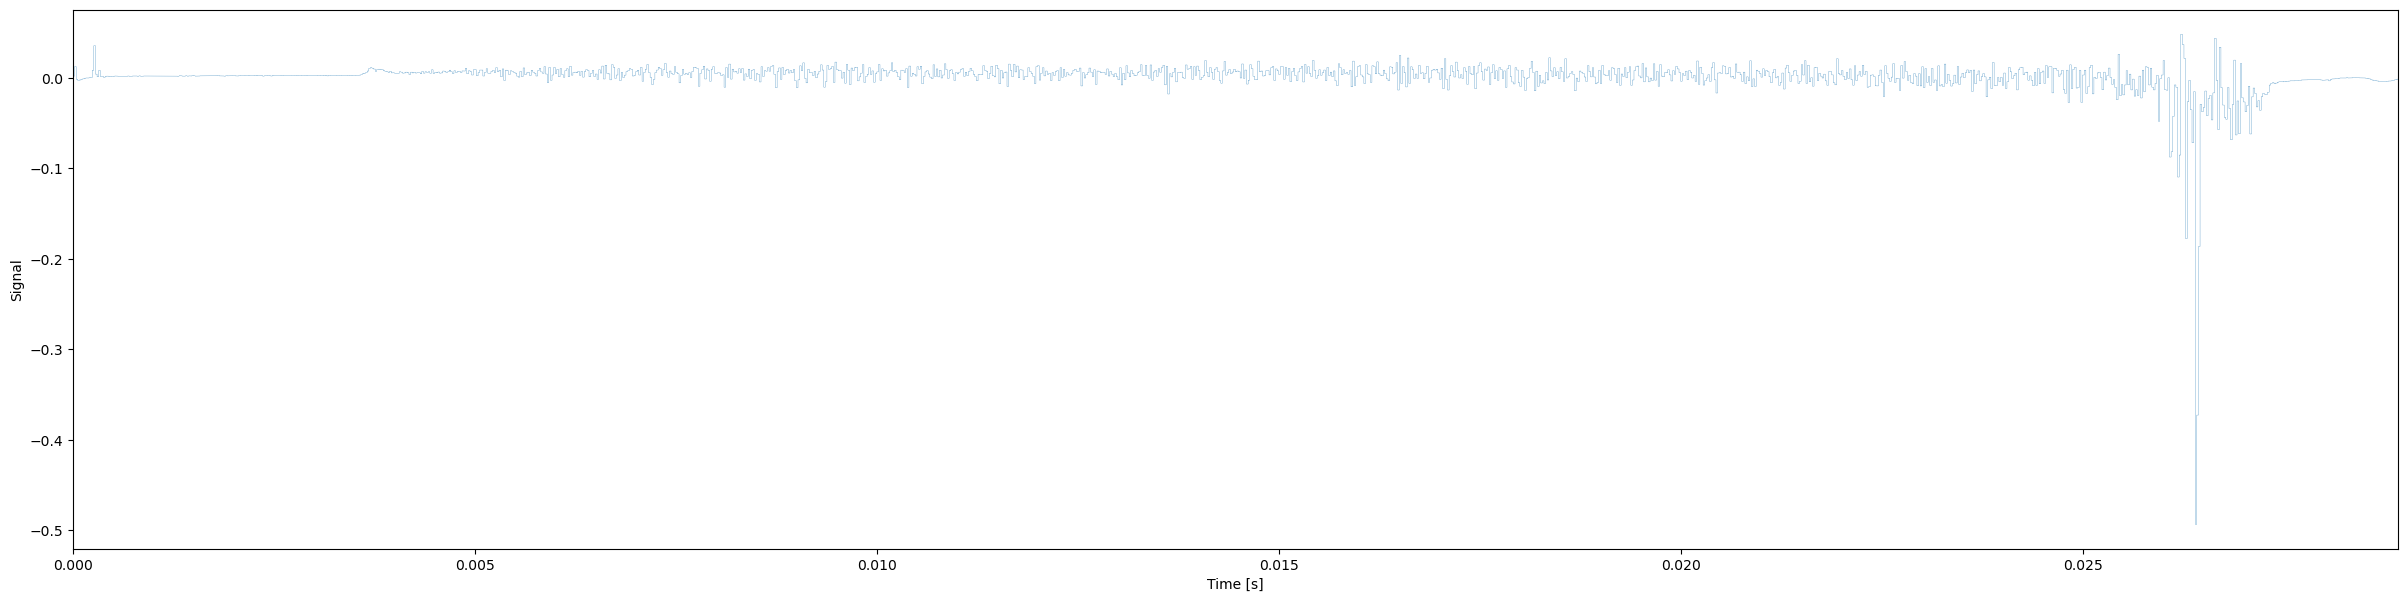

In [19]:
identifier='U_mc13'
#save_folder ='F:/mereni/mereni2609_24_golem_Be_win/shot'+str(shot)
file_name=get_file(shot, identifier)

#mir_coil_fig = str(global_path)+'shot'+str(shot)+'/U_mc13.png'
#print(mir_coil_fig)
time, signal,signal_mirnov, signal_new, increment, time_new = mirnov_coils(file_name, mir_coil_fig,xminim,xmaxim_s,ymaxim)

signal_mc13=signal_new

## Wavelet 
definice funkce
bez minimalni wavelet koherence

In [20]:

import pycwt as wavelet
import math

#def smooth_wavelet(spec, scales, s0_coef, dj=1/16, wavelet_width=20):
def smooth_wavelet(spec, scales, s0_coef, wavelet_width, dj=1/16):
    """
    Vyhlazuje waveletové spektrum pomocí váženého klouzavého průměru.

    Parametry:
        spec - spektrální hustota (numpy array tvaru [N_freqs, N_times])
        scales - odpovídající škály (pole tvaru [N_freqs])
        dj - kroky mezi škálami
        wavelet_width - šířka mateřské vlnky (např. 6 pro Morletovu)

    Návratová hodnota:
        Vyhlazené spektrum (stejné rozměry jako vstupní `spec`).
    """
    m, n = spec.shape
    smoothed = np.zeros((m, n))

    for i in range(m):  
        k = min(n, max(1, int(scales[i] / scales[0] * wavelet_width *s0_coef)))  # Omezení max. délky okna
        #k = min(n, max(1, int(scales[i] / scales[0] * wavelet_width )))  # Omezení max. délky okna
        #k = min(n, max(1, int((1/scales[i]) * wavelet_width *4)))  # Omezení max. délky okna
        kernel = np.ones(k) / k
        smoothed_row = np.convolve(spec[i, :], kernel, mode='same')

        # Ujistíme se, že výsledná délka odpovídá původnímu `spec`
        smoothed[i, :] = smoothed_row[:n]  

    return smoothed, wavelet_width


def wavelet_mirnov(wavelet_mirnov_figure,mirnov_coil_name,caption, mirnov_signal,xminim,xmaxim_s, ymaxim, wavelet_width):
    mirnov_signal = mirnov_signal

    #min_len = min(len(mirnov_signal), len(hxr_signal))
    #mirnov_signal = mirnov_signal[:min_len]
    #hxr_signal = hxr_signal[:min_len]

    print("mirnov "+str(len(mirnov_signal)))
    print(len(mirnov_signal))
    
    fs = 50000 #pro dt = 20000 ns
    #fs = 25000 #pro dt = 40000 ns
    #fs = 12500 #pro dt = 80000 ns
    #fs = 20000 #pro dt = 50000 ns
    #fs_mir=500000/increment
    
    
    
    morlet = 3
    mother = wavelet.Morlet(morlet)
    dt = 1 / fs  # Vzorkovací krok
    
    s0_coef = 2
    #s0 = 2*dt  # Počáteční škála
    s0 = s0_coef*dt  # Počáteční škála
    
    dj_coef=16
    #dj = 1 / 12  # Rozlišení škály - standard
    #dj = 1 / 32  # Rozlišení škály - jemne
    dj = 1 / 16  # Rozlišení škály - jemne
    #J = 8 / dj  # Počet škálových úrovní
    #dj = 1 / dj_coef
    
    s0_name = str(s0_coef)+'*dt'
    dj_name='1/'+str(dj_coef)
        
    s0_name_file = str(s0_coef)+'dt'
    dj_name_file='1_'+str(dj_coef)
    

    T = float(len(mirnov_signal)*dt)
    
    print(T)
    J = math.log2(T/s0) / dj # Počet škálových úrovní
    #J = 350 # Počet škálových úrovní
    print(J)
    
    #normalizace
    #hxr_signal = (hxr_signal - np.mean(hxr_signal)) / np.std(hxr_signal)  

    # Wavelet transformace obou signálů
    W_x, scales, freqs, coi, _, _ = wavelet.cwt(mirnov_signal, dt, dj, s0, J, mother)
    #W_y, _, _, _, _, _ = wavelet.cwt(mirnov_signal, dt, dj, s0, J, mother)
    
    
    '''
    # Výpočet wavelet coherence
    Wxy = W_x * np.conj(W_y)
    S_Wxy = smooth_wavelet(Wxy, scales)  # Vyhlazení Wxy
    Sx = smooth_wavelet(np.abs(W_x) ** 2, scales)
    Sy = smooth_wavelet(np.abs(W_y) ** 2, scales)
    Sxy = np.abs(S_Wxy) ** 2 / (Sx * Sy)  # Koherence by měla být mezi 0 a 1
    '''
    # Výpočet wavelet coherence
    #Wxy = W_x * np.conj(W_y)
    #S_Wxy, wavelet_width = smooth_wavelet(Wxy, scales, s0_coef, wavelet_width)  # Vyhlazení Wxy
    Sx, wavelet_width = smooth_wavelet(np.abs(W_x * np.conj(W_x)), scales, s0_coef, wavelet_width)
    #Sy, wavelet_width = smooth_wavelet(np.abs(W_y * np.conj(W_y)), scales, s0_coef, wavelet_width)
    #Sxy = np.abs(S_Wxy) / np.sqrt(Sx * Sy)  # Koherence by měla být mezi 0 a 1
    
    energy_density_mir = (np.abs(W_x) ** 2)
    #energy_density_mir = (np.abs(W_y) ** 2)
    
    #S_energy_density_hxr, wavelet_width = smooth_wavelet(energy_density_hxr, scales, s0_coef, wavelet_width)
    S_energy_density_mir, wavelet_width = smooth_wavelet(energy_density_mir, scales, s0_coef, wavelet_width)
    


    time_wave=[]
    for i in range(0,len(mirnov_signal)):
        time_wave.append(float(i*dt))

    time_wave = np.array(time_wave)
    print(time_wave.shape)
    
    '''
    # Zobrazení výsledků
    #fig, ax = plt.subplots(figsize=(10, 5))
    fig, ax = plt.subplots(figsize=(30, 6))
    #T, S = np.meshgrid(t, freqs)
    T, S = np.meshgrid(time_wave, freqs)
    
    #print(t.shape, freqs.shape, Sxy.shape)
    #print(W_x.shape)  # (počet frekvencí, počet časových vzorků waveletu)
    #print(T.shape)  # (počet frekvencí, počet časových vzorků waveletu)

    #c = ax.contourf(T, S, Sxy, levels=100, cmap='jet')
    c = ax.contourf(T, S, Sx, levels=250, cmap='jet')
    #ax.set_yscale('log')
    plt.ylim(0,ymaxim)
    plt.xlim(xminim,xmaxim_s)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    #caption='Wavelet Coherence TPX3 + '+str(mirnov_coil_name) 
    #ax.set_title('Wavelet Coherence')
    ax.set_title(caption)
    fig.colorbar(c, label='Coherence')

    #plt.show()
    #'F:/mereni/mereni2609_24_golem_Be_win/shot'+str(shot)+'/U_mc13_fs'+str(fs)+'nperseg'+str(nperseg)+'noverlap'+str(noverlap)+'nfft'+str(nfft)+str(win)+'_win.png'
    plt.savefig(wavelet_mirnov_figure, dpi = 100)
    '''
    return time_wave, freqs, energy_density_mir, S_energy_density_mir, morlet,s0_name,dj_name,s0_name_file,dj_name_file
    

In [21]:
### Wavelet koherence Mir. coil 1 + TPX3
#DT = '40000'
DT = '20000'
#DT = '40000'
#DT = '80000'
#DT = '50000'



########
wavelet_width1=10
wavelet_width2=15
wavelet_width3=20

wavelet_width=wavelet_width1

mirnov_coil_name = 'MC1'

wavelet_mirnov_figure = str(global_path)+'shot'+str(shot)+'/wavelet_mirnov_'+str(mirnov_coil_name)+'_dt'+str(DT)+'ns.png'
caption = 'Wavelet ' + str(mirnov_coil_name)+', dt = '+str(DT)+' ns'

time_wave1, freqs1, energy_density_mir1, S_energy_density_mir1, morlet,s0_name,dj_name,s0_name_file,dj_name_file = wavelet_mirnov(wavelet_mirnov_figure,mirnov_coil_name,caption, signal_mc1,xminim,xmaxim_s,ymaxim, wavelet_width)
S_energy_density_mir1_1=S_energy_density_mir1


mirnov_coil_name = 'MC5'

wavelet_mirnov_figure = str(global_path)+'shot'+str(shot)+'/wavelet_mirnov_'+str(mirnov_coil_name)+'_dt'+str(DT)+'ns.png'
caption = 'Wavelet ' + str(mirnov_coil_name)+', dt = '+str(DT)+' ns'

time_wave5, freqs5, energy_density_mir5, S_energy_density_mir5, morlet,s0_name,dj_name,s0_name_file,dj_name_file = wavelet_mirnov(wavelet_mirnov_figure,mirnov_coil_name,caption, signal_mc5,xminim,xmaxim_s,ymaxim, wavelet_width)
S_energy_density_mir1_5=S_energy_density_mir5



mirnov_coil_name = 'MC9'

wavelet_mirnov_figure = str(global_path)+'shot'+str(shot)+'/wavelet_mirnov_'+str(mirnov_coil_name)+'_dt'+str(DT)+'ns.png'
caption = 'Wavelet ' + str(mirnov_coil_name)+', dt = '+str(DT)+' ns'

time_wave9, freqs9, energy_density_mir9, S_energy_density_mir9, morlet,s0_name,dj_name,s0_name_file,dj_name_file = wavelet_mirnov(wavelet_mirnov_figure,mirnov_coil_name,caption, signal_mc9,xminim,xmaxim_s,ymaxim, wavelet_width)
S_energy_density_mir1_9=S_energy_density_mir9


mirnov_coil_name = 'MC13'

wavelet_mirnov_figure = str(global_path)+'shot'+str(shot)+'/wavelet_mirnov_'+str(mirnov_coil_name)+'_dt'+str(DT)+'ns.png'
caption = 'Wavelet ' + str(mirnov_coil_name)+', dt = '+str(DT)+' ns'

time_wave13, freqs13, energy_density_mir13, S_energy_density_mir13, morlet,s0_name,dj_name,s0_name_file,dj_name_file = wavelet_mirnov(wavelet_mirnov_figure,mirnov_coil_name,caption, signal_mc13,xminim,xmaxim_s,ymaxim, wavelet_width)
S_energy_density_mir1_13=S_energy_density_mir13





mirnov 2500
2500
0.05
164.60339807279118
(2500,)
mirnov 2500
2500
0.05
164.60339807279118
(2500,)
mirnov 2500
2500
0.05
164.60339807279118
(2500,)
mirnov 2500
2500
0.05
164.60339807279118
(2500,)


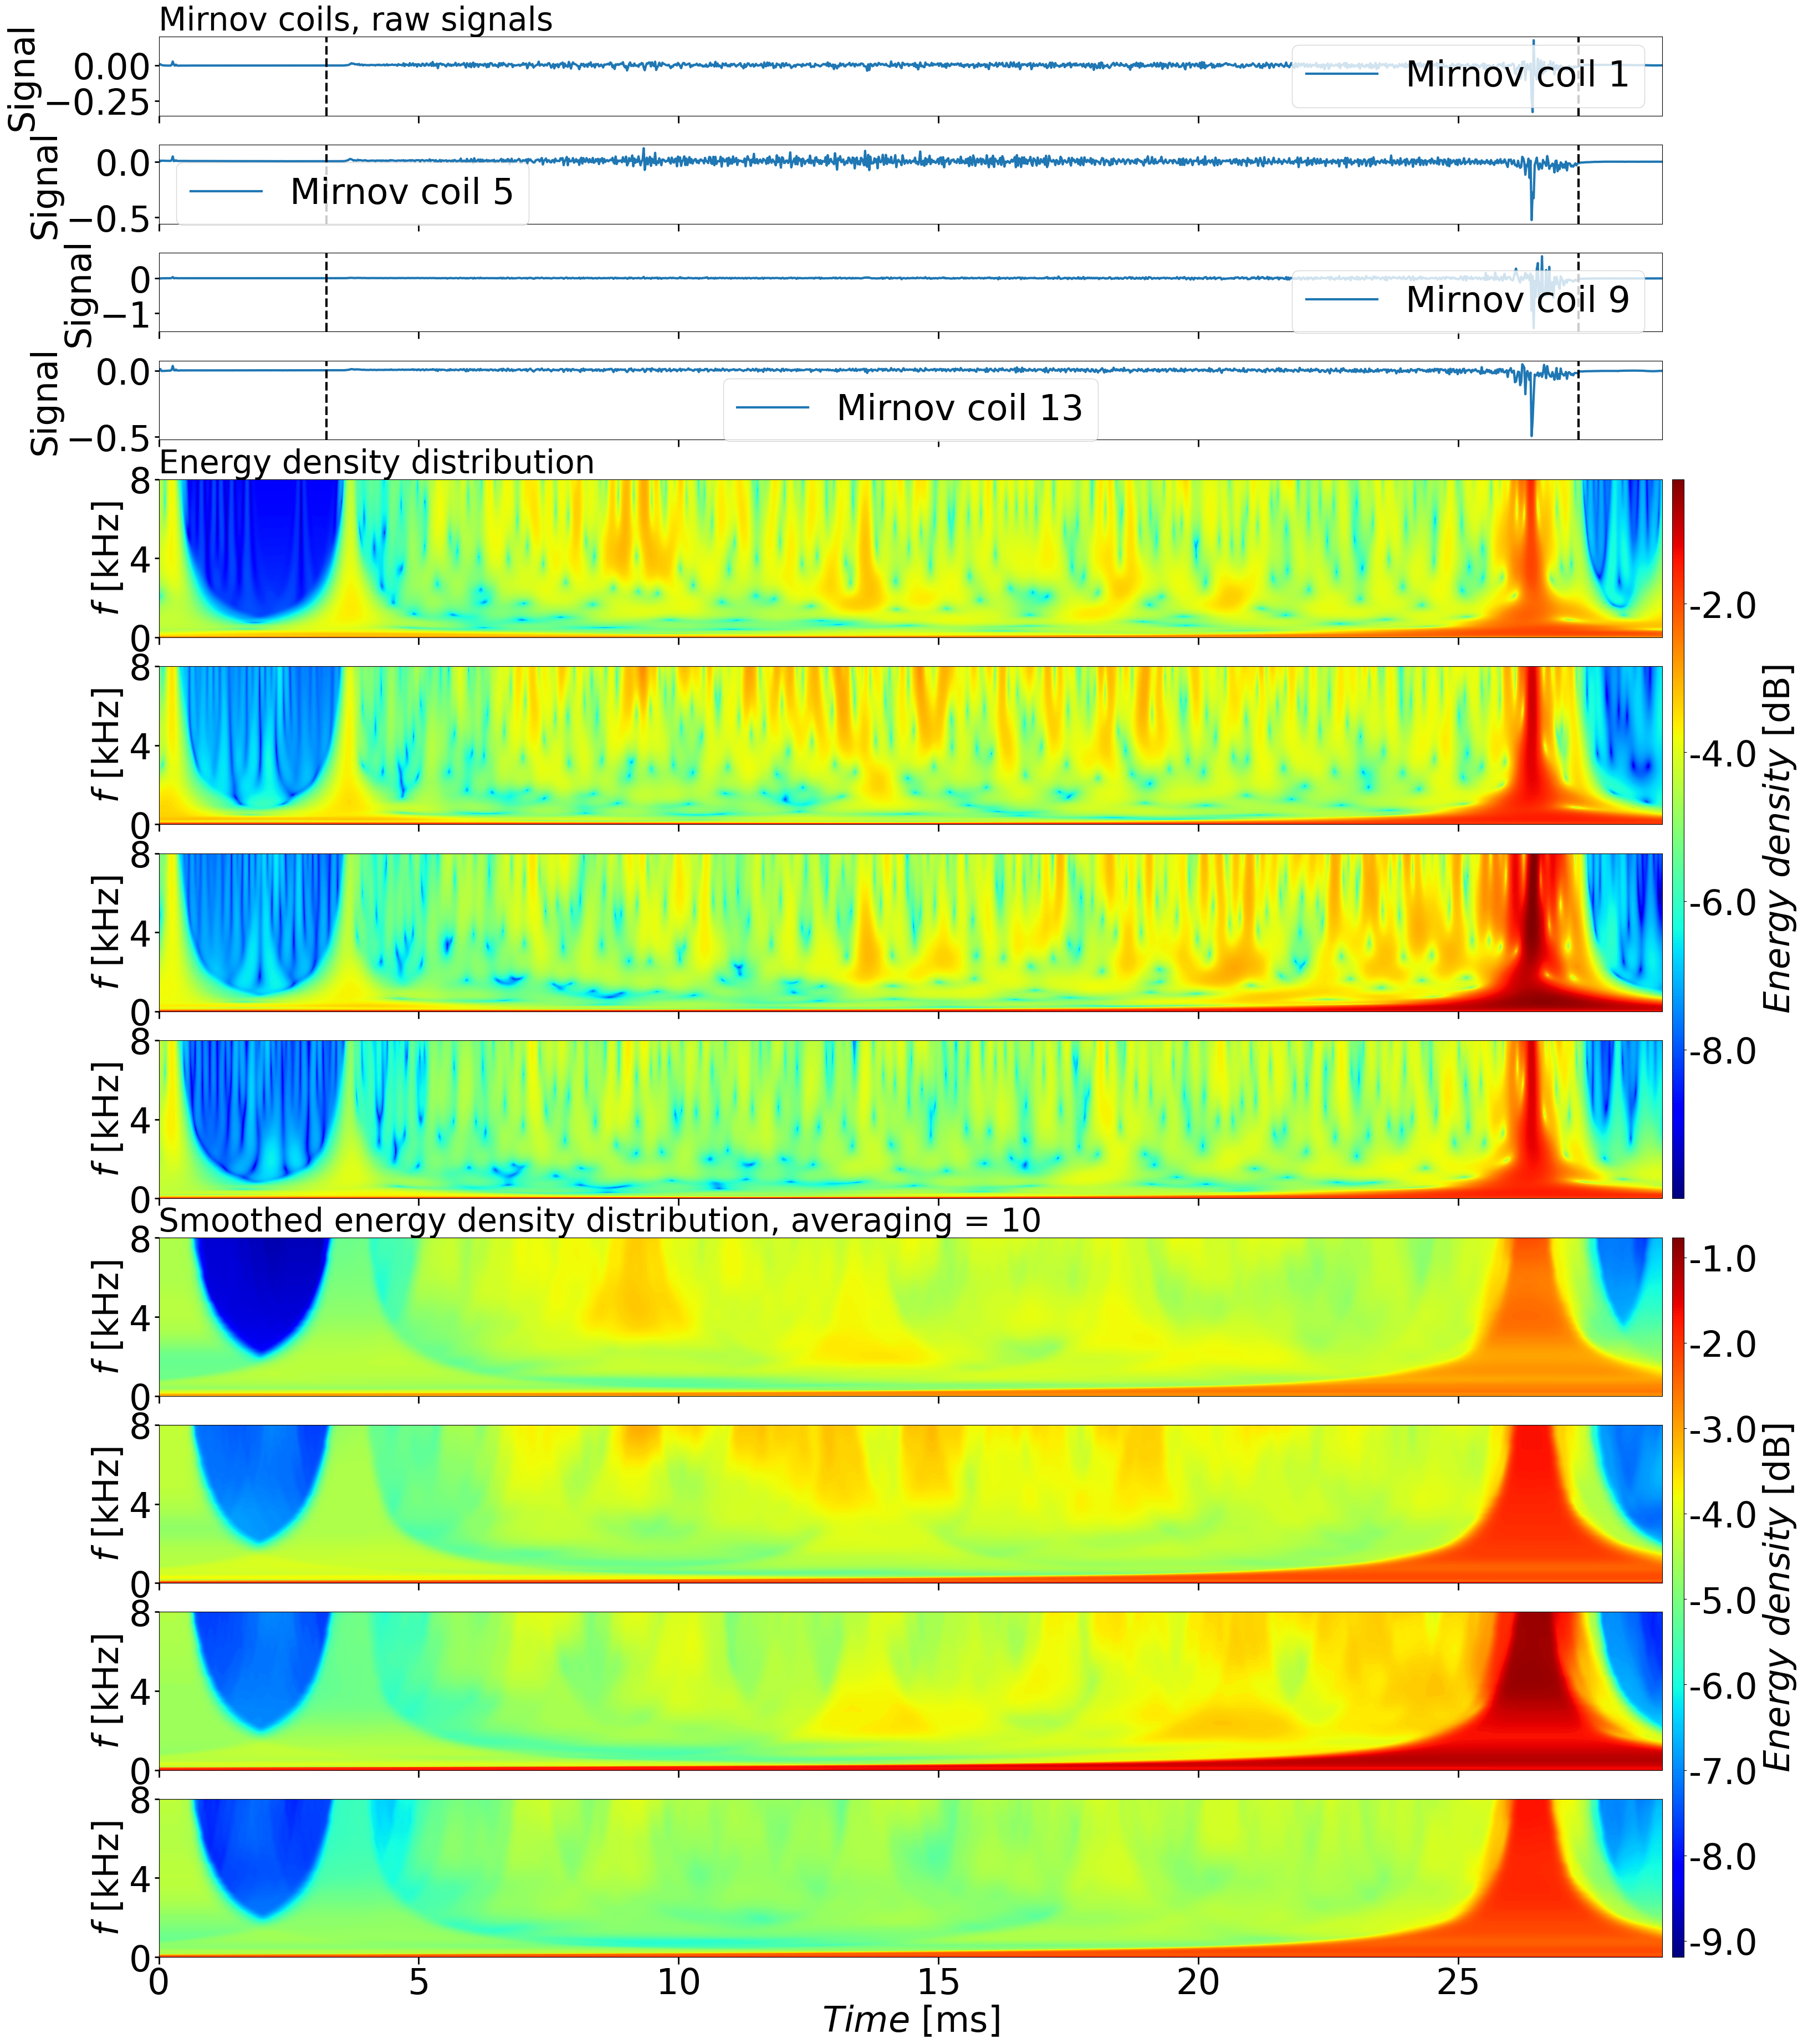

In [22]:


ymaxim = ymaxim/1000


import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import FormatStrFormatter
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize



# Nastavení velikosti fontu
plt.rcParams.update({'font.size': 46}) #28
length_x=9
width_x=2 
labelsize_x=46

length_y=6
width_y=2
labelsize_y=46

fontsize_title = 42

# Vytvoření obrázku a definice gridspec layoutu
const=1
mezera = const*0.075
mezera2 = 0.055

fig = plt.figure(figsize=(35, 45))
fig.subplots_adjust(hspace=0.0)  # nebo např. 0.02 pro mírnou mezeru
gs = fig.add_gridspec(23, 3, height_ratios=[const*0.15, mezera2, const*0.15, mezera2,
                                            const*0.15, mezera2, const*0.15, mezera, 
                                            const*0.3, mezera2, const*0.3, mezera2, const*0.3, mezera2, 
                                            const*0.3, mezera, 
                                            const*0.3, mezera2, const*0.3, mezera2, const*0.3, mezera2, 
                                            const*0.3])



for i in range (0,len(time_new)):
    time_new[i]=time_new[i]*1000
#time_new=time_new*1000

# 5. řádek - Signál Mirnov coil v čase (4 grafy pod sebou)
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(time_new, signal_mc1, linestyle='solid', label='Mirnov coil 1', linewidth=3)#, linewidth=0.2)
ax0.set_xlim(xminim, xmaxim)
if is_plasma == 1:
        for t in (t_plasma_start, t_plasma_end):
                ax0.axvline(t, color='k', linestyle='--', linewidth=3)
#ax.set_xlabel('Time [s]')
ax0.set_ylabel('Signal')
ax0.legend()  # Přidání legendy
ax0.set_title('Mirnov coils, raw signals', loc='left', fontsize=fontsize_title)

ax0.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax0.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax0.tick_params(labelbottom=False) #potlači čisla na ose x

####
ax = fig.add_subplot(gs[1, :])
ax.set_visible(False) #mezery mezi obrazky
####

# 6. řádek - Signál Mirnov coil v čase (4 grafy pod sebou)
ax = fig.add_subplot(gs[2, :])
ax.plot(time_new, signal_mc5, linestyle='solid', label='Mirnov coil 5', linewidth=3)#, linewidth=0.2)
ax.set_xlim(xminim, xmaxim)
if is_plasma == 1:
        for t in (t_plasma_start, t_plasma_end):
                ax.axvline(t, color='k', linestyle='--', linewidth=3)
#ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal')
ax.legend()  # Přidání legendy

ax.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax.tick_params(labelbottom=False) #potlači čisla na ose x

####
ax = fig.add_subplot(gs[3, :])
ax.set_visible(False) #mezery mezi obrazky
####

# 7. řádek - Signál Mirnov coil v čase (4 grafy pod sebou)
ax7 = fig.add_subplot(gs[4, :])
ax7.plot(time_new, signal_mc9, linestyle='solid', label='Mirnov coil 9', linewidth=3)#, linewidth=0.2)
ax7.set_xlim(xminim, xmaxim)
if is_plasma == 1:
        for t in (t_plasma_start, t_plasma_end):
                ax7.axvline(t, color='k', linestyle='--', linewidth=3)
#ax.set_xlabel('Time [s]')
ax7.set_ylabel('Signal')
ax7.legend()  # Přidání legendy

ax7.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax7.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax7.tick_params(labelbottom=False) #potlači čisla na ose x

####
ax = fig.add_subplot(gs[5, :])
ax.set_visible(False) #mezery mezi obrazky
####

# 8. řádek - Signál Mirnov coil v čase (4 grafy pod sebou)
ax8 = fig.add_subplot(gs[6, :])
ax8.plot(time_new, signal_mc13, linestyle='solid', label='Mirnov coil 13', linewidth=3)#, linewidth=0.2)
ax8.set_xlim(xminim, xmaxim)
if is_plasma == 1:
        for t in (t_plasma_start, t_plasma_end):
                ax8.axvline(t, color='k', linestyle='--', linewidth=3)
#ax.set_xlabel('Time [s]')
ax8.set_ylabel('Signal')
ax8.legend()  # Přidání legendy

ax8.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax8.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax8.tick_params(labelbottom=False) #potlači čisla na ose x

width = 0.775 #šířka subplotů pro fig = plt.figure(figsize=(35, 50))
pad = 0.005
cbar_width = 0.006  # Šířka colorbaru (menší hodnota = užší)
cbar_pad = 0.005  # Mezera mezi grafem a colorbarem

#time_wave_out1,freqs_out1, Sxy_out1, energy_density_hxr_out1, energy_density_mir1, 
#S_energy_density_hxr_out1, S_energy_density_mir1,
#np.log10(energy_density_hxr1 + 1e-10)

####
ax = fig.add_subplot(gs[7, :])
ax.set_visible(False) #mezery mezi obrazky
####

#oooooooooooooooooooooooooooooooooo
vmin = min(np.log10(energy_density_mir1 + 1e-10).min(), np.log10(energy_density_mir5 + 1e-10).min(),
           np.log10(energy_density_mir9 + 1e-10).min(), np.log10(energy_density_mir13 + 1e-10).min())

vmax = max(np.log10(energy_density_mir1 + 1e-10).max(), np.log10(energy_density_mir5 + 1e-10).max(),
           np.log10(energy_density_mir9 + 1e-10).max(), np.log10(energy_density_mir13 + 1e-10).max())
#oooooooooooooooooooooooooooooooooo

################################################################################################ 11. - 16. radek
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


ax5 = fig.add_subplot(gs[8, :])
ax5.set_visible(False)
pos = ax5.get_position()
ax5 = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_1 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_1 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_1 + 1e-10), levels=250, cmap='jet')
c = ax5.contourf(T, S,  np.log10(energy_density_mir1 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax5.set_ylabel('$f$ [kHz]')
ax5.set_ylim(0, ymaxim)
ax5.set_xlim(xminim, xmaxim)
ax5.set_yticks(np.linspace(0, ymaxim, 3)) 
ax5.set_title('Energy density distribution', loc='left', fontsize=fontsize_title)

ax5.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax5.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax5.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
####
ax = fig.add_subplot(gs[9, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax = fig.add_subplot(gs[10, :])
ax.set_visible(False)
pos = ax.get_position()
ax = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_5 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_5 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_5 + 1e-10), levels=250, cmap='jet')
c = ax.contourf(T, S,  np.log10(energy_density_mir5 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax.set_ylabel('$f$ [kHz]')
ax.set_ylim(0, ymaxim)
ax.set_xlim(xminim, xmaxim)
ax.set_yticks(np.linspace(0, ymaxim, 3))
#ax.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


####
ax = fig.add_subplot(gs[11, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax = fig.add_subplot(gs[12, :])
ax.set_visible(False)
pos = ax.get_position()
ax = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_9 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_9 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_9 + 1e-10), levels=250, cmap='jet')
c = ax.contourf(T, S,  np.log10(energy_density_mir9 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax.set_ylabel('$f$ [kHz]')
ax.set_ylim(0, ymaxim)
ax.set_xlim(xminim, xmaxim)
ax.set_yticks(np.linspace(0, ymaxim, 3))  
#ax.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
####
ax = fig.add_subplot(gs[13, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax30 = fig.add_subplot(gs[14, :])
ax30.set_visible(False)
pos = ax30.get_position()
ax30 = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_13 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_13 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_13 + 1e-10), levels=250, cmap='jet')
c = ax30.contourf(T, S,  np.log10(energy_density_mir13 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax30.set_xlabel('Time [ms]')
ax30.set_ylabel('$f$ [kHz]')
#ax30.set_xlabel('$Time$ [ms]')
ax30.set_ylim(0, ymaxim)
ax30.set_xlim(xminim, xmaxim)
ax30.set_yticks(np.linspace(0, ymaxim, 3))  
#ax30.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax30.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax30.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax30.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


#oooooooooooooooooooooooooooooooooo
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Umístění podle dvou os (např. ax20 a ax30)
pos1 = ax5.get_position()
pos2 = ax30.get_position()

cbar_ax = fig.add_axes([pos2.x1 + cbar_pad, min(pos1.y0, pos2.y0), cbar_width, max(pos1.y1, pos2.y1) - min(pos1.y0, pos2.y0)])
colorbar = fig.colorbar(sm, cax=cbar_ax, label='$Energy$ $density$ [dB]')
colorbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax5.set_position(pos1)  # Vrátí subplot do původní velikosti
ax30.set_position(pos2)  # Vrátí subplot do původní velikosti
#oooooooooooooooooooooooooooooooooo

################################################################################################ 11. - 16. radek konec

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
#####333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
#oooooooooooooooooooooooooooooooooo
vmin = min(np.log10(S_energy_density_mir1_1 + 1e-10).min(), np.log10(S_energy_density_mir1_5 + 1e-10).min(),
           np.log10(S_energy_density_mir1_9 + 1e-10).min(), np.log10(S_energy_density_mir1_13 + 1e-10).min())

vmax = max(np.log10(S_energy_density_mir1_1 + 1e-10).max(), np.log10(S_energy_density_mir1_5 + 1e-10).max(),
           np.log10(S_energy_density_mir1_9 + 1e-10).max(), np.log10(S_energy_density_mir1_13 + 1e-10).max())
#oooooooooooooooooooooooooooooooooo

####
ax = fig.add_subplot(gs[15, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax7= fig.add_subplot(gs[16, :])
ax7.set_visible(False)
pos = ax7.get_position()
ax7 = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_1 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_1 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_1 + 1e-10), levels=250, cmap='jet')
c = ax7.contourf(T, S,  np.log10(S_energy_density_mir1_1 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax7.set_ylabel('$f$ [kHz]')
ax7.set_ylim(0, ymaxim)
ax7.set_xlim(xminim, xmaxim)
ax7.set_yticks(np.linspace(0, ymaxim, 3)) 
ax7.set_title('Smoothed energy density distribution, averaging = 10', loc='left', fontsize=fontsize_title)

ax7.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax7.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax7.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
####
ax = fig.add_subplot(gs[17, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax = fig.add_subplot(gs[18, :])
ax.set_visible(False)
pos = ax.get_position()
ax = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_5 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_5 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_5 + 1e-10), levels=250, cmap='jet')
c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_5 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax.set_ylabel('$f$ [kHz]')
ax.set_ylim(0, ymaxim)
ax.set_xlim(xminim, xmaxim)
ax.set_yticks(np.linspace(0, ymaxim, 3))
#ax.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


####
ax = fig.add_subplot(gs[19, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax = fig.add_subplot(gs[20, :])
ax.set_visible(False)
pos = ax.get_position()
ax = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_9 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_9 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_9 + 1e-10), levels=250, cmap='jet')
c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_9 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax.set_xlabel('Time [ms]')
ax.set_ylabel('$f$ [kHz]')
ax.set_ylim(0, ymaxim)
ax.set_xlim(xminim, xmaxim)
ax.set_yticks(np.linspace(0, ymaxim, 3))  
#ax.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
ax.tick_params(labelbottom=False) #potlači čisla na ose x

#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
####
ax = fig.add_subplot(gs[21, :])
ax.set_visible(False) #mezery mezi obrazky
####

ax10 = fig.add_subplot(gs[22, :])
ax10.set_visible(False)
pos = ax10.get_position()
ax10 = fig.add_axes([pos.x0, pos.y0, width, pos.height])  # [left, bottom, width, height]
T, S = np.meshgrid(time_wave1, freqs1)
T = T * 1000
S = S/1000 
#vmin= np.log10(S_energy_density_mir1_13 + 1e-10).min()
#vmax=np.log10(S_energy_density_mir1_13 + 1e-10).max()
#c = ax.contourf(T, S,  np.log10(S_energy_density_mir1_13 + 1e-10), levels=250, cmap='jet')
c = ax10.contourf(T, S,  np.log10(S_energy_density_mir1_13 + 1e-10), levels=250, cmap='jet', vmin=vmin, vmax=vmax)
#ax30.set_xlabel('Time [ms]')
ax10.set_ylabel('$f$ [kHz]')
ax10.set_xlabel('$Time$ [ms]')
ax10.set_ylim(0, ymaxim)
ax10.set_xlim(xminim, xmaxim)
ax10.set_yticks(np.linspace(0, ymaxim, 3))  
#ax30.set_title('Smoothed energy density distribution', loc='left', fontsize=fontsize_title)

ax10.tick_params(axis='x', length=length_x, width=width_x, labelsize=labelsize_x)
ax10.tick_params(axis='y', length=length_y, width=width_y, labelsize=labelsize_y)
#ax30.tick_params(labelbottom=False) #potlači čisla na ose x
#####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


#oooooooooooooooooooooooooooooooooo
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Umístění podle dvou os (např. ax20 a ax30)
pos1 = ax7.get_position()
pos2 = ax10.get_position()

cbar_ax = fig.add_axes([pos2.x1 + cbar_pad, min(pos1.y0, pos2.y0), cbar_width, max(pos1.y1, pos2.y1) - min(pos1.y0, pos2.y0)])
colorbar = fig.colorbar(sm, cax=cbar_ax, label='$Energy$ $density$ [dB]')
colorbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax7.set_position(pos1)  # Vrátí subplot do původní velikosti
ax10.set_position(pos2)  # Vrátí subplot do původní velikosti
#oooooooooooooooooooooooooooooooooo



comb = 'Mirnov'
#output_image_final = str(global_path) + 'shot' + str(shot) + '/'+str(comb)+'_dt'+str(DT)+'ns_wavelet_width'+str(wavelet_width1)+'_s0'+str(s0_name_file)+'_dj'+str(dj_name_file)+'_morlet'+str(morlet)+'.png'
#output_image_final = str(comb)+'_'+ 'shot'+ str(shot) +'_dt'+str(DT)+'ns_wavelet_width'+str(wavelet_width1)+'_s0'+str(s0_name_file)+'_dj'+str(dj_name_file)+'_morlet'+str(morlet)+'.png'
#output_image_final = str(comb)+'_'+ 'shot'+ str(shot) +'_dt'+str(DT)+'ns_wavelet_width'+str(wavelet_width1)+'_s0'+str(s0_name_file)+'_dj'+str(dj_name_file)+'_morlet'+str(morlet)
output_image_final = str(comb)+'Wavelet'

# Zobrazení grafu
plt.savefig(output_image_final, dpi=150, bbox_inches='tight')
#plt.savefig(output_image_final, format='svg', bbox_inches='tight')
#plt.show()